In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [65]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
class_names = ['airplane','automobile','cat', 'dog', 'bird', 'deer', 'frog', 'horse','ship','truck']

In [66]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [67]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.3620 - accuracy: 0.5106
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9909 - accuracy: 0.6551
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8336 - accuracy: 0.7080
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7078 - accuracy: 0.7543
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5915 - accuracy: 0.7947
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4789 - accuracy: 0.8329
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3788 - accuracy: 0.8670
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.2881 - accuracy: 0.9009
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2195 - accuracy: 0.9240
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [70]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.3341 - accuracy: 0.7011 - 2s/epoch - 6ms/step

Test accuracy: 0.7010999917984009


'horse'

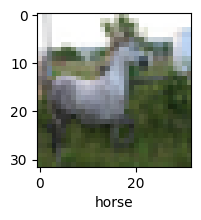

In [71]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(class_names[y[index][0]])

plot_sample(test_images, test_labels,69)
class_names[test_labels[69][0]]